In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

#### Data loading and preprocessing

In [2]:
data=pd.read_csv("word_countries.csv")
print(data.shape)
data.head()

(227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
ID=[i for i in range(155015,155015+len(data))]
coresp={k:v for k,v in zip(ID,data["Country"])}
Country=list(coresp.values())

In [4]:
#data["ID"]=ID
data.insert(2, "ID", ID)
data=data.drop(labels=["Country","Region"],axis=1)
data.head()

,ID,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,155015,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,155016,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,155017,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,155018,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,155019,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
data.dtypes

ID                                      int64
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [6]:
def convert(x):
    
    return float(x.replace(',','.'))
    
convert("6,5")

6.5

In [7]:
columns=data.loc[:, data.dtypes == object]
columns=columns.columns
columns=list(columns)
data[columns] = data[columns].astype(str)
for a in columns:
    data[a]=data[a].apply(lambda x: convert(x))

In [8]:
data.dtypes

ID                                      int64
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

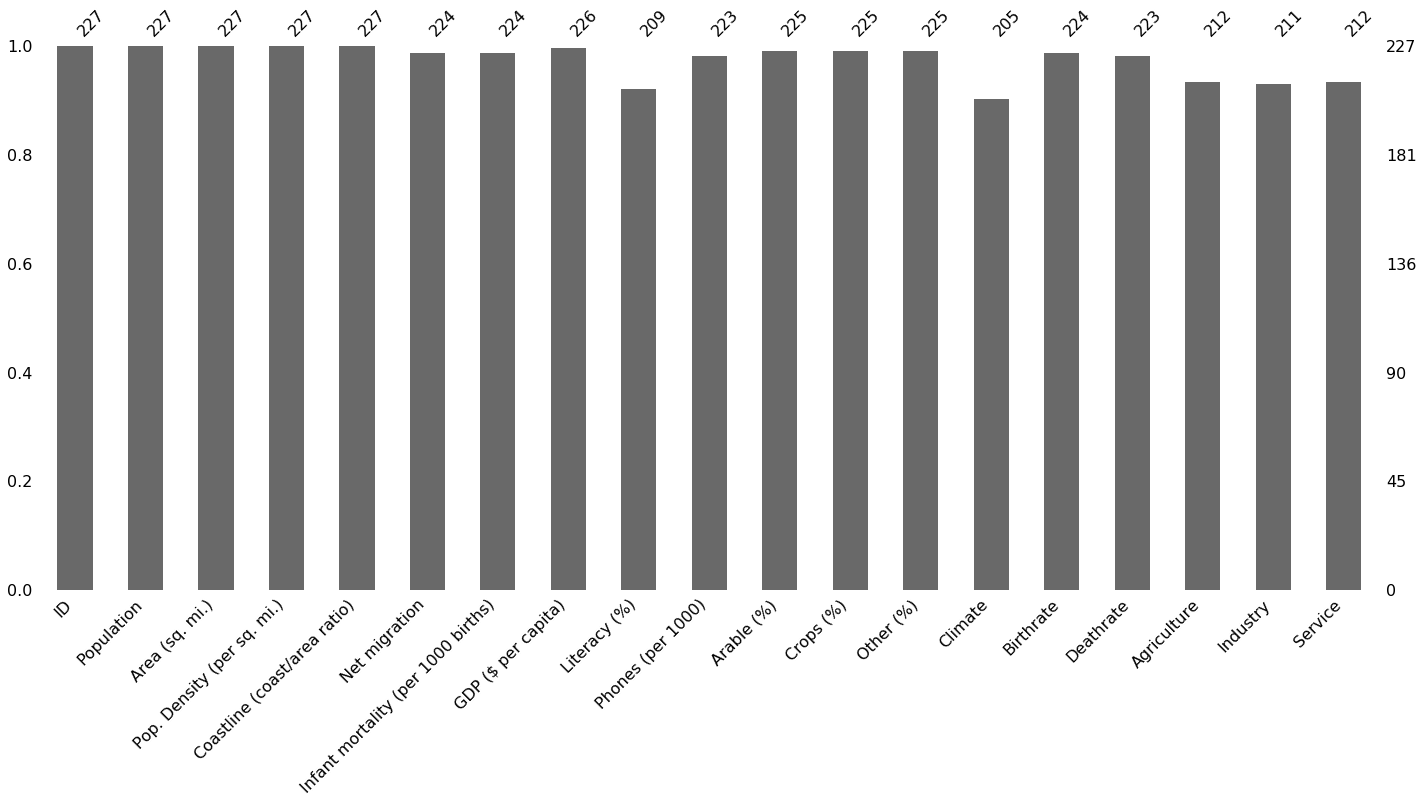

In [9]:
import missingno as msno
msno.bar(data)

#### Handle missing values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X=imputer.fit_transform(data)
X.shape

(227, 19)

#### Normalize data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

# SOM training

In [72]:
from minisom import MiniSom
som = MiniSom(x = 5, y = 4, input_len = 19, sigma = 0.8, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

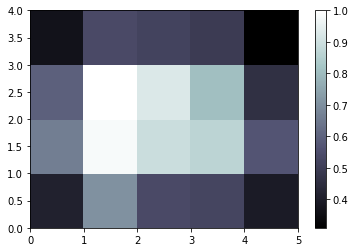

In [73]:
from pylab import bone, pcolor, colorbar, plot, show
#plt.figure(figsize=(22,22))
bone()
pcolor(som.distance_map().T)
colorbar()

In [74]:
mapps = som.win_map(X)

In [75]:
mid=som.distance_map().T

In [76]:
#index=np.where(mid >0.0)
#index

In [77]:
keys=list(mapps.keys())
values=list(mapps.values())
values=[len(v) for v in values ]
result={key:value for key,value in zip(keys,values)}
result

{(0, 0): 11,
 (4, 2): 16,
 (0, 3): 6,
 (4, 3): 17,
 (3, 3): 5,
 (0, 2): 12,
 (4, 0): 8,
 (4, 1): 15,
 (0, 1): 12,
 (3, 2): 9,
 (1, 0): 11,
 (3, 1): 10,
 (2, 0): 16,
 (1, 1): 17,
 (1, 3): 12,
 (2, 3): 5,
 (2, 1): 14,
 (2, 2): 10,
 (3, 0): 11,
 (1, 2): 10}

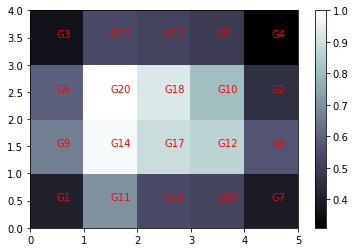

In [78]:
#plt.figure(figsize=(70,20))
bone()
pcolor(som.distance_map().T)
colorbar()
dictio={}
j=0
for k,v in mapps.items():
    j=j+1
    plt.text(k[0]+0.5,k[1]+0.5,"G"+str(j),color="red")
    liste=[]
    for i in range(len(v)):
        country=v[i]
        country=country.reshape(1, -1)
        country=scaler.inverse_transform(country)
        country=coresp[country[0][0]]
        liste.append(country[:4])
    dictio["Groupe"+str(j)]=liste
print(dictio)

In [20]:
df=pd.DataFrame.from_dict(dictio, orient='index')

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Groupe1,Afghanistan,Angola,Benin,Bhutan,Burkina Faso,Burundi,Central African Rep.,Chad,"Congo, Dem. Rep.",Cote d'Ivoire,...,Sierra Leone,Somalia,None,None,None,None,None,None,None,None
Groupe2,Albania,American Samoa,Andorra,Anguilla,Argentina,Armenia,Austria,Belarus,Bosnia & Herzegovina,Cape Verde,...,Kazakhstan,"Korea, North",Latvia,Liechtenstein,Macedonia,None,None,None,None,None
Groupe3,Algeria,Azerbaijan,Bahrain,Belize,Bolivia,Brazil,Brunei,China,Colombia,Ecuador,...,None,None,None,None,None,None,None,None,None,None
Groupe4,Antigua & Barbuda,Aruba,Australia,"Bahamas, The",Barbados,Belgium,Bermuda,British Virgin Is.,Bulgaria,Canada,...,None,None,None,None,None,None,None,None,None,None
Groupe5,Bangladesh,Comoros,Haiti,Hungary,India,Lithuania,Mauritius,Moldova,Poland,Romania,...,None,None,None,None,None,None,None,None,None,None


In [46]:
a=[1,2]
str(a)

'[1, 2]'